FileNotFoundError: [Errno 2] No such file or directory: '/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF_Quijote/data/vpfdata_3.0-25.0-8-10-10000-fiducial-1.dat'

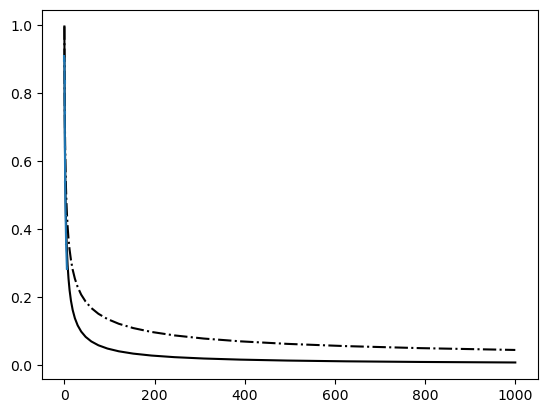

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

cosm = 'fiducial'
simnum = 0
ns = 10000
rbin = 8
rmin, rmax = 3., 25.
njk = 10
for simnum in [0,1]:
    filename = f'/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF_Quijote/data/vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{simnum}.dat'

    plotdata = ascii.read(filename)

    x = np.geomspace(1E-2,1E3,50)
    c='k'
    plt.plot(x,np.log(1+x)/x,label='Negative Binomial',c=c)
    plt.plot(x,(np.sqrt(1+2*x)-1)/x,label='Thermodynamical',c=c,ls='-.')

    nxi = plotdata['N_mean']*plotdata['xi']
    chi = plotdata['chi']
    chi_std = plotdata['chi_std']
    plt.errorbar(nxi,chi,yerr=chi_std,label=f'{cosm}-{simnum}')
plt.xscale('log')
plt.legend(loc=3)
plt.show()


